In [1]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement


# PARCIAL FINAL

Juan José Gaitán - 201912484

Juan Daniel Rodriguez - 201921704

## a)

In [2]:
# Estados y priors

Estados = np.array([0,1])

Prior =  np.array([0.2,0.8])


In [3]:
# Matrices de emisión y transmision

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])


In [4]:

DictH = {0:'Justa',1:'Sesgada'}
DictH[0]


'Justa'

In [5]:

DictO = {0:'Cara',1:'Sello'}
DictO[1]


'Sello'

In [6]:

Obs = np.array([1,0,0,0,1,0,1,0])


In [7]:

def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    print(CStates)
    return np.array(Permu)


In [8]:

HiddenStates = GetHiddenStates(Estados,8)


[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [9]:

len(HiddenStates)
print(Obs)


[1 0 0 0 1 0 1 0]


## b)

In [10]:

def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    #print(p, State)
    
    return p


In [11]:

dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)    


In [12]:

PObs = np.sum(P)
print(PObs)


0.0019344381513984013


In [13]:

maxP1 = np.max(P)
ii1 = np.where( P == np.amax(P))
print( f'Estados ocultos = {HiddenStates[ii1]}' , f'Probabilidad máxima = {maxP1}' )


Estados ocultos = [[1 1 1 1 0 0 0 0]] Probabilidad máxima = 0.0001911029760000001


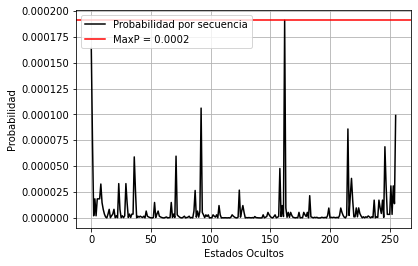

In [14]:

plt.plot(P,color='k',label='Probabilidad por secuencia')
plt.axhline(y=maxP1, c='r', label=f'MaxP = {round(maxP1,4)}' )
plt.grid(axis='both')
plt.xlabel('Estados Ocultos')
plt.ylabel('Probabilidad')
plt.legend(loc='best') 
plt.show()


## c)

In [15]:

ObsStates = GetHiddenStates([0,1],8)

NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P1 = np.zeros(dim)
    
    for i in range(dim):
        P1[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P1)
    

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [16]:

maxP2 = np.max(PObs)
ii2 = np.where( PObs == np.amax(PObs))
print( f'Estados Observables = {ObsStates[ii2]}' , f'Probabilidad máxima = {maxP2}' )


Estados Observables = [[0 0 0 0 0 0 0 0]] Probabilidad máxima = 0.13698241367042568


Estados: 256


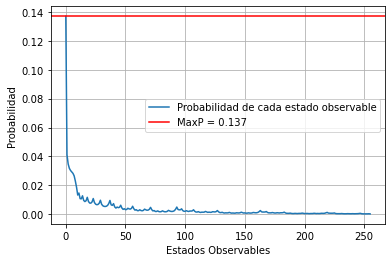

In [17]:

print(f'Estados: {len(PObs)}')
plt.plot(PObs)
plt.axhline(y=maxP2, color='r')
plt.legend(['Probabilidad de cada estado observable',f'MaxP = {round(maxP2,3)}'])
plt.xlabel('Estados Observables')
plt.ylabel('Probabilidad')
plt.grid(axis='both')
plt.show()


## d)

In [18]:
# Sumatoria de los estados observables

P_Total = np.sum(PObs)

print(P_Total)


1.0000000000000007


## e)
#### ¿Depende el resultado de la probabilidad a-priori?

Si depende el resultado de la probabilidad a-priori, debido a que este se encuentra relacionado a los valores iniciales otorgados por el enunciado en la utilización de este método. Se puede observar que la secuencia oculta más probable y su valor de probabilidad cambian significativamente, porque el cálculo de la probabilidad comienza con un número diferente, por lo que consecuentemente, el resultado se ve afectado. Por otro lado, las probabilidades de los estados observables se ven ligeramente afectadas, pero hay variaciones notorias.

En conclusión, el valor a-priori sí afecta el resultado, ya que este valor se utiliza para calcular la probabilidad de la correspondiente secuencia de estados ocultos o estados observables. Se puede ver un claro indicio del porqué utilizando la función, en la cual se ve un cambio en las secuencias de las probabilidades.